['Events;1']
{'Events;1': 'TTree'}
[10.8, 15.7]
[3.28]
[10.8, 15.7]
[10.5, 16.3]
[3.28]
[11.4, 17.6, 9.62, 3.5]
[3.28, 3.64, 32.9, 23.7]
[3.57, 4.57, 4.37]
[57.6, 53]
[11.3, 23.9]
[10.2, 14.2]
[11.5, 3.47]


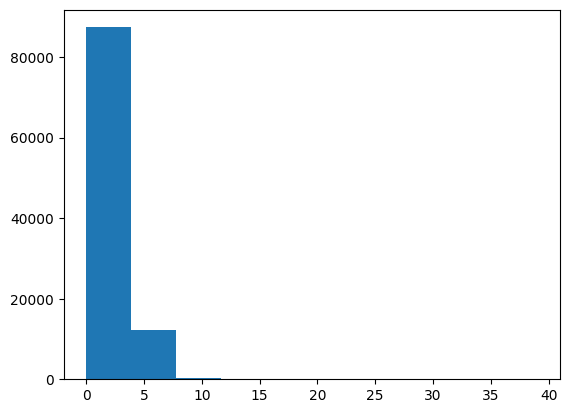

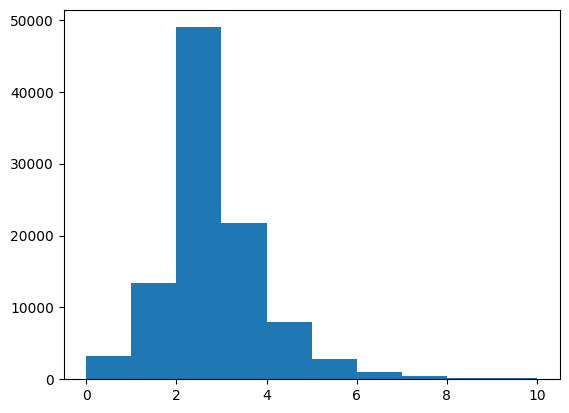

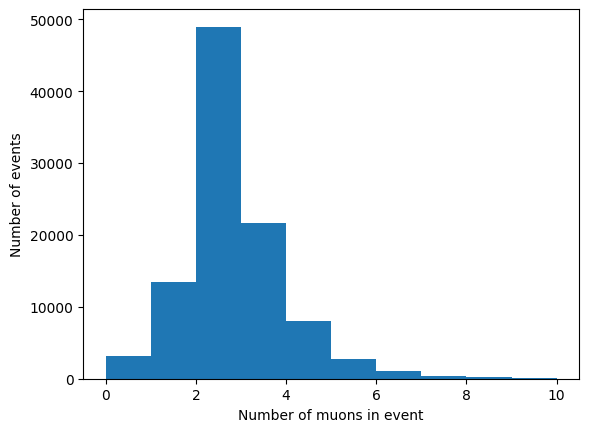

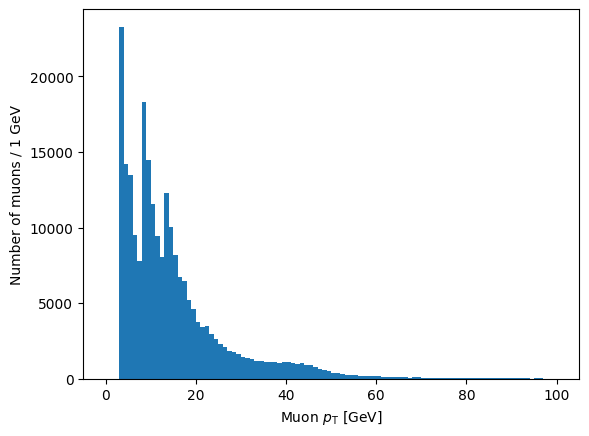

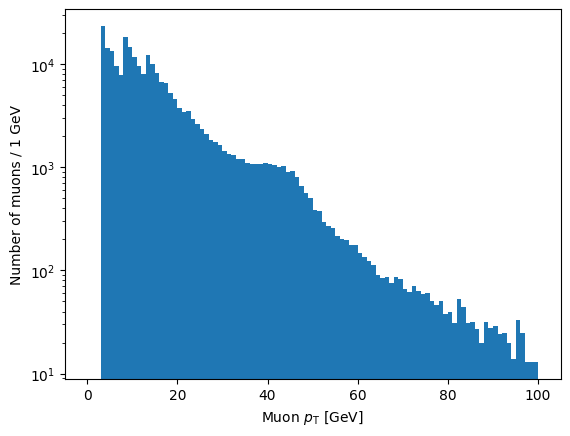

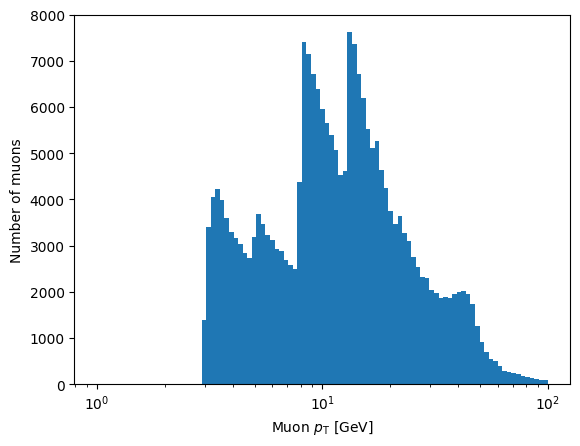

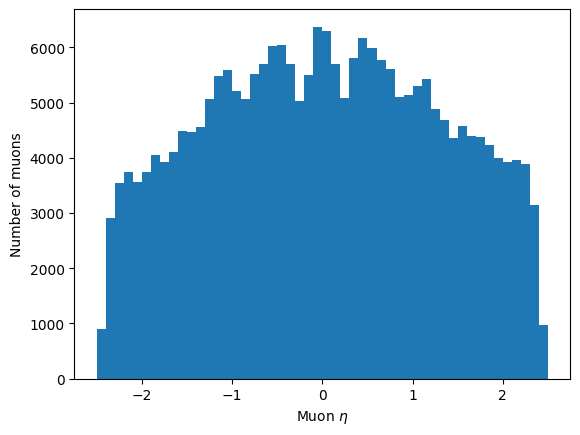

ModuleNotFoundError: No module named 'Histograms.ipynb'; 'Histograms' is not a package

ModuleNotFoundError: No module named 'Histograms.ipynb'; 'Histograms' is not a package

In [4]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
import vector

%run Columnar_Analysis.ipynb
import import_ipynb
import Columnar_Analysis.ipynb

In [6]:
two_muons_mask = branches['nMuon'] == 2

In [5]:
muon_p4 = vector.zip({'pt': branches['Muon_pt'], 'eta': branches['Muon_eta'], 'phi': branches['Muon_phi'], 'mass': branches['Muon_mass']})


In [7]:
two_muons_p4 = muon_p4[two_muons_mask]

In [8]:
two_muons_p4

<MomentumArray4D [[{rho: 10.8, phi: ..., ...}, ...], ...] type='48976 * var...'>

In [9]:
two_muons_p4.pt
two_muons_p4.eta
two_muons_p4.phi
two_muons_p4.E
two_muons_p4.mass

<Array [[0.106, 0.106], ..., [0.106, 0.106]] type='48976 * var * float32'>

In [11]:
first_muon_p4 = two_muons_p4[:, 0]
second_muon_p4 = two_muons_p4[:, 1]

In [12]:
first_muon_p4.deltaR(second_muon_p4)

<Array [3.05, 2.92, 3.16, 0.0955, ..., 4.47, 3.06, 2.88] type='48976 * float32'>

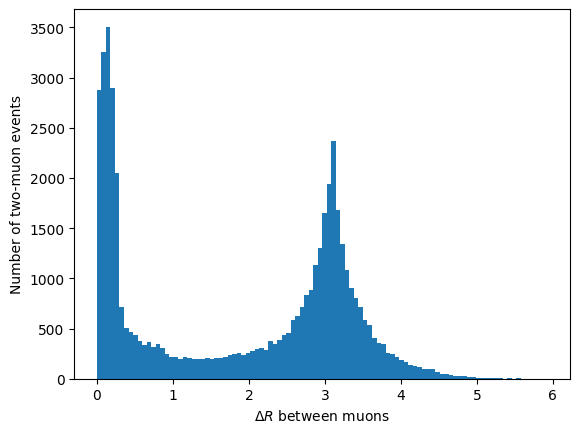

In [13]:
plt.hist(first_muon_p4.deltaR(second_muon_p4), bins=100)
plt.xlabel('$\Delta R$ between muons')
plt.ylabel('Number of two-muon events')
plt.show()

In [14]:
sum_p4 = first_muon_p4 + second_muon_p4
sum_p4

<MomentumArray4D [{rho: 8.79, phi: 1.83, ...}, ...] type='48976 * Momentum4...'>

In [15]:
two_muons_charges = branches['Muon_charge'][two_muons_mask]
opposite_sign_muons_mask = two_muons_charges[:, 0] != two_muons_charges[:, 1]

In [16]:
dimuon_p4 = sum_p4[opposite_sign_muons_mask]

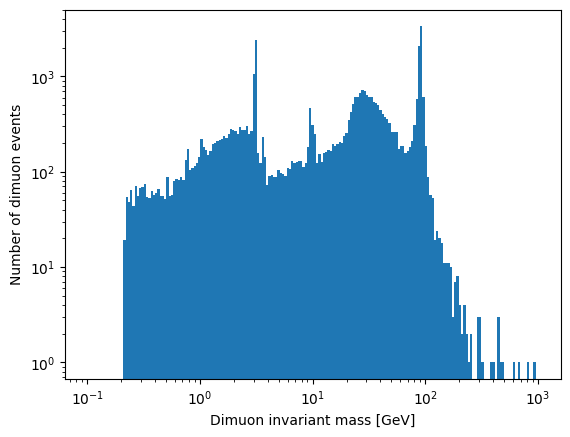

In [17]:
plt.hist(dimuon_p4.mass, bins=np.logspace(np.log10(0.1), np.log10(1000), 200))
plt.xlabel('Dimuon invariant mass [GeV]')
plt.ylabel('Number of dimuon events')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [18]:
len(dimuon_p4)

37183

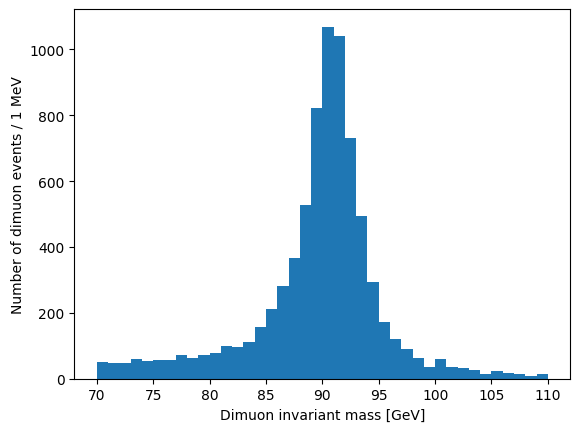

In [19]:
plt.hist(dimuon_p4.mass, bins=40, range=(70, 110))
plt.xlabel('Dimuon invariant mass [GeV]')
plt.ylabel('Number of dimuon events / 1 MeV')
plt.show()

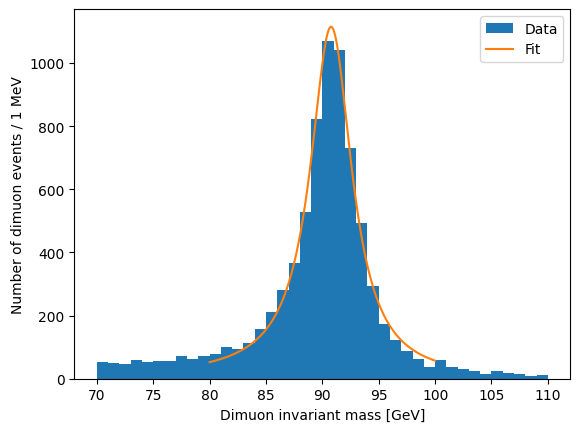

In [20]:
from scipy.optimize import curve_fit

def relativistic_breit_wigner(x, resonance_mass, width, normalization):
    gamma = np.sqrt(resonance_mass ** 2 * (resonance_mass ** 2 + width ** 2))
    k = 2.0 * np.sqrt(2) * resonance_mass * width * gamma / (np.pi * np.sqrt(resonance_mass ** 2 + gamma))
    return normalization * k / ((x ** 2 - resonance_mass ** 2) ** 2 + resonance_mass ** 2 * width ** 2)

bin_contents, bin_edges = np.histogram(dimuon_p4.mass.to_numpy(), bins=20, range=(80, 100))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.0
popt, pcov = curve_fit(relativistic_breit_wigner, bin_centers, bin_contents, p0=[90, 10, 1000], sigma=np.sqrt(bin_contents))

plt.hist(dimuon_p4.mass, bins=40, range=(70, 110), label='Data')
x = np.linspace(80, 100, 200)
y = relativistic_breit_wigner(x, *popt)
plt.plot(x, y, label='Fit')
plt.xlabel('Dimuon invariant mass [GeV]')
plt.ylabel('Number of dimuon events / 1 MeV')
plt.legend()
plt.show()

In [21]:
popt[0]

90.77220936326736